In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
def generate_sample_data(count: int):
  x = np.random.normal(0, 1, count)
  y = np.random.normal(0, 1, count)
  return x, y



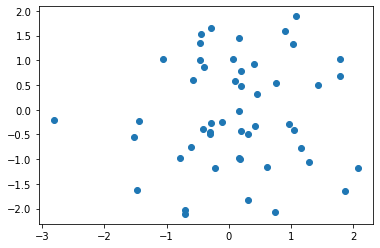

In [4]:
sample_1_x, sample_1_y = generate_sample_data(50)
plt.scatter(sample_1_x, sample_1_y)

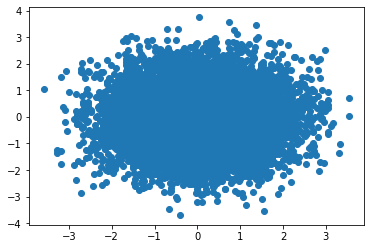

In [5]:
sample_2_x, sample_2_y = generate_sample_data(10000)
plt.scatter(sample_2_x, sample_2_y)

In [6]:
def fit_and_summary(x, y):
  X = sm.add_constant(x)
  model = sm.OLS(y, X)
  results = model.fit()
  print(results.summary())

def fit_and_get_p(x, y):
  X = sm.add_constant(x)
  model = sm.OLS(y, X)
  results = model.fit()
  return results.pvalues

In [7]:
sample_1_x, sample_1_y = generate_sample_data(50)
fit_and_summary(sample_1_x, sample_1_y)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.2122
Date:                Tue, 24 May 2022   Prob (F-statistic):              0.647
Time:                        04:55:09   Log-Likelihood:                -78.896
No. Observations:                  50   AIC:                             161.8
Df Residuals:                      48   BIC:                             165.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0840      0.170      0.494      0.6

In [8]:
sample_2_x, sample_2_y = generate_sample_data(10000)
fit_and_summary(sample_2_x, sample_2_y)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                  0.004452
Date:                Tue, 24 May 2022   Prob (F-statistic):              0.947
Time:                        04:55:10   Log-Likelihood:                -14185.
No. Observations:               10000   AIC:                         2.837e+04
Df Residuals:                    9998   BIC:                         2.839e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0041      0.010     -0.410      0.6

In [9]:
sample_1_p_values = []
for i in range(1000):
  sample_1_x, sample_1_y = generate_sample_data(50)
  p_value = fit_and_get_p(sample_1_x, sample_1_y)
  # print(p_value)
  sample_1_p_values.append(p_value)

sample_2_p_values = []
for i in range(1000):
  sample_2_x, sample_2_y = generate_sample_data(10000)
  p_value = fit_and_get_p(sample_2_x, sample_2_y)
  sample_2_p_values.append(p_value)

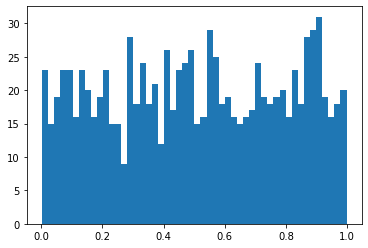

In [10]:
sample_1_p_values = np.array(sample_1_p_values)
plt.hist(sample_1_p_values[:, 0], bins=50)
plt.show()

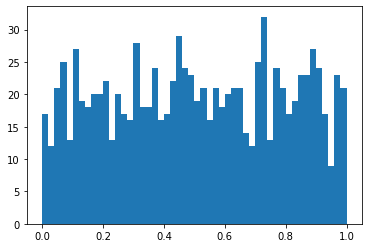

In [11]:
plt.hist(sample_1_p_values[:, 1], bins=50)
plt.show()

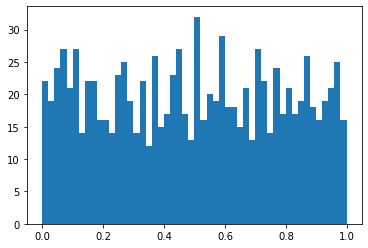

In [256]:
sample_2_p_values = np.array(sample_2_p_values)
plt.hist(sample_2_p_values[:, 0], bins=50)
plt.show()

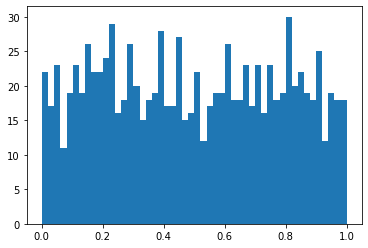

In [257]:
plt.hist(sample_2_p_values[:, 1], bins=50)
plt.show()